coeficientes [[-16.340000000000003], [16.340000000000003]]
El rendimiento es: 
[98.04000000000002]


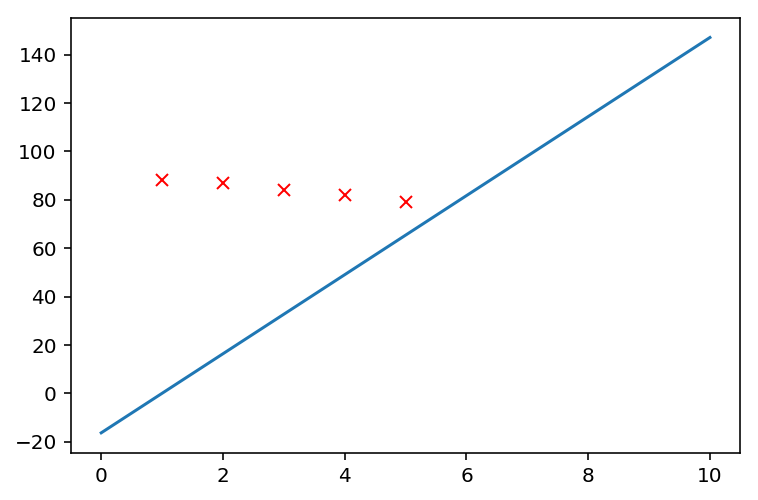

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def createMatriz(m,n,v):
    C = []
    for i in range(m):
        C.append([])
        for j in range(n):
            C[i].append(v)

    return C

def getDimensiones(A):
    return (len(A),len(A[0]))

def sumMatrices(A,B):
    Am,An = getDimensiones(A)
    Bm,Bn = getDimensiones(B)
    if Am != Bm or An != Bn:
        print("Las dimensiones son diferentes")
        return []
    C = createMatriz(Am,An,0)
    for i in range(Am):
        for j in range(An):
            C[i][j] = A[i][j] + B[i][j]
    return C

def restaMatrices(A,B):
    Am,An = getDimensiones(A)
    Bm,Bn = getDimensiones(B)
    if Am != Bm or An != Bn:
        print("Las dimensiones son diferentes")
        return []
    C = createMatriz(Am,An,0)
    for i in range(Am):
        for j in range(An):
            C[i][j] = A[i][j] - B[i][j]
    return C

def mulMatrices(A,B):
    Am,An = getDimensiones(A)
    Bm,Bn = getDimensiones(B)
    if An != Bm:
        print("Las matrices no son conformables")
        return []
    C = createMatriz(Am,Bn,0)
    for i in range(Am):
        for j in range(Bn):
            for k in range(An):
                C[i][j] += A[i][k] * B[k][j]
    return C
def getMenorMatriz(A,r,c):
    m,n = getDimensiones(A)
    C = createMatriz(m-1,n-1,0)
    for i in range(m):
        if i == r:
            continue
        for j in range(n):
            if j == c:
                continue
            Ci = i
            if i > r:
                Ci = i - 1
            Cj = j
            if j > c:
                Cj = j -1
            C[Ci][Cj] = A[i][j]
    return C

def detMatriz(A):
    m,n = getDimensiones(A)
    if m != n:
        print("La matriz no es cuadrada")
        return -1
    if m == 1:
        return m
    if m == 2:
        return  A[0][0]*A[1][1] - A[0][1]*A[1][0]
    det = 0
    for j in range(n):
        det += (-1)**(j)*A[0][j]*detMatriz(getMenorMatriz(A,0,j))
    return det

def getMatrizAdyacente(A):
    m,n = getDimensiones(A)
    C = createMatriz(m,n,0)
    for i in range(m):
        for j in range(n):
            C[i][j] = (-1)**(i+j)*detMatriz(getMenorMatriz(A,i,j))
    return C

def getMatrizTranspuesta(A):
    m,n = getDimensiones(A)
    C = createMatriz(n,m,0)
    for i in range(m):
        for j in range(n):
            C[j][i] = A[i][j]
    return C

def getMatrizInversa(A):
    detA = detMatriz(A)
    if detA == 0:
        print("La matriz no tiene inversa")
        return 0
    At =  getMatrizTranspuesta(A)
    adyAt =  getMatrizAdyacente(At)
    m,n = getDimensiones(A)
    C = createMatriz(m,n,0)
    for i in range(m):
        for j in range(n):
            C[i][j] = (1/detA)*adyAt[i][j]
    return C

x = [1,2,3,4,5]
y = [88,87,84,82,79]

plt.plot(x,y,'rx')


def regresion(n,x,y):
    dim = n + 1
    A = createMatriz(dim,dim,0)
    for i in range(dim):
        for j in range(dim):
            A[i][j] = sum(xi**(i+j) for xi in x)
    C = createMatriz(dim,1,0)
    for i in range(dim):
        C[i][0] = sum(yi * xi**(i) for xi,yi in zip(x,y) )
    invA = getMatrizInversa(A)
    B = mulMatrices(invA,C)
    return B

coef = regresion(1,x,y)
print("coeficientes",coef)


x2 = np.linspace(0, 10, 100)

def evalua(x,coef):
    y = []
    for i in range(len(x)):
        y.append(0)
        for j in range(len(coef)):
            y[i] += coef[j][0] * x[i] **(j)
    return y
y2 = evalua(x2,coef)
s=[7]
y3 = evalua(s,coef)
print("El rendimiento es: ")
print(y3)
plt.plot(x2,y2)
plt.show()

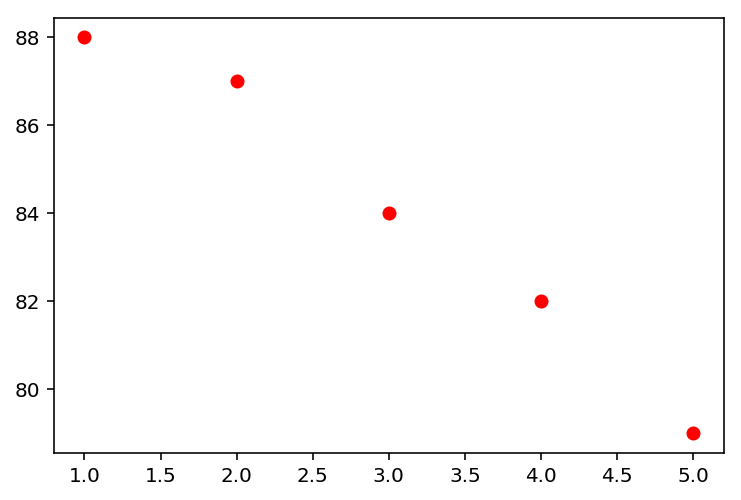

El peso es:
74.80000000000001


In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np

x = [1,2,3,4,5]
y = [88,87,84,82,79]

n = 5
plt.plot(x, y, 'ro')
plt.show()

sumx = sum(x)
sumy = sum(y)
sumx2 = sum( xi * xi for xi in x  )
sumxy = sum ( xi * yi for xi, yi in zip(x,y) )

xprom = sumx/n
yprom = sumy/n
sumarr = sum((xi-xprom )*(yi-yprom)for xi,yi in zip(x,y))
sumbaj1= sum((xi-xprom)**2 for xi in x)
sumbaj2= sum((yi-yprom)**2 for yi in y)
r = sumarr / ((math.sqrt(sumbaj1))*(math.sqrt(sumbaj2)))
m = (sumxy - (sumx*sumy/n))/(sumx2 - (sumx*sumx/n))
b = (sumy/n) - (m * (sumx/n))
res = m*7 + b


print("El peso es:")
print (res)